<a href="https://colab.research.google.com/github/vatsalmehta163/codsoft1/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary packages

In [ ]:
import numpy as np
import pandas as pd
!pip install chardet
import chardet
import matplotlib.pyplot as plt

In [ ]:
with open('/content/spam.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding=encoding)

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Drop unnecessary columns

In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

remove duplicates

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.rename({'v1':'target','v2':'text'},axis=1,inplace=True)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


EDA

In [ ]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

feature engineering

In [ ]:
import nltk
nltk.download('punkt')

df['num_characters'] = df['text'].apply(len)

# Calculate the number of words in each SMS using NLTK tokenizer and add as a new column
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Calculate the number of sentences in each SMS using NLTK tokenizer and add as a new column
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Text processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    lm = WordNetLemmatizer()
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = text.lower().split()
    text = [lm.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

def prepare_features(text_data):
    vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
    features = vectorizer.fit_transform(text_data)
    return features, vectorizer

Run the Models

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(df['text']).toarray()

# Extract the target values
y = df['target']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_logreg))
print(accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[909   0]
 [ 37  88]]
0.9642166344294004
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       909
        spam       1.00      0.70      0.83       125

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.97      0.96      0.96      1034



SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[908   1]
 [ 18 107]]
0.9816247582205029
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       909
        spam       0.99      0.86      0.92       125

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[888  21]
 [ 22 103]]
0.9584139264990329
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       909
        spam       0.83      0.82      0.83       125

    accuracy                           0.96      1034
   macro avg       0.90      0.90      0.90      1034
weighted avg       0.96      0.96      0.96      1034



Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

[[909   0]
 [ 35  90]]
0.9661508704061895
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       909
        spam       1.00      0.72      0.84       125

    accuracy                           0.97      1034
   macro avg       0.98      0.86      0.91      1034
weighted avg       0.97      0.97      0.96      1034



Comparing Accuracy

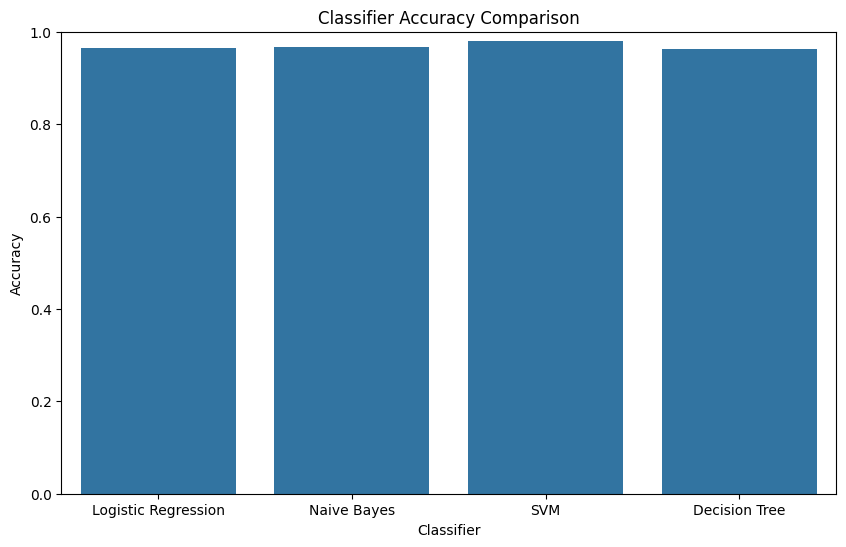

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy')
}
accuracies = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

#plot the graph

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()
